In [1]:
import future
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 6

Populating the interactive namespace from numpy and matplotlib


Slides from 2017 - need to be updated!

# Data visualization - better heatmaps with Seaborn

Use the help function to recreate the plot below:

```
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
sns.heatmap(z,ax=ax)
```

In [2]:
def plot_nice_heatmap():
    x = np.linspace(-1,1,11)
    y = np.linspace(-1,1,11)
    X, Y = np.meshgrid(x, y)
    z = X*X+Y*Y
    fig = plt.figure(figsize=(7,7))
    ax = plt.gca()
    sns.heatmap(z,ax=ax,linewidths=.1,annot=True,xticklabels=x,
                yticklabels=y,cbar=False)
    ax.set(xlabel='x',ylabel='y',title='Nice heatmap')

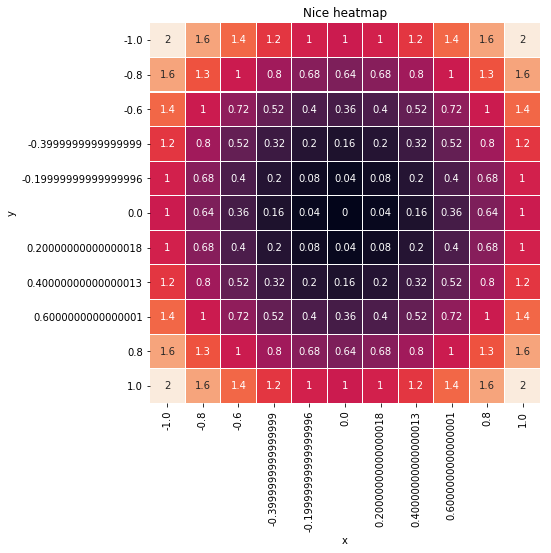

In [3]:
plot_nice_heatmap()


# Data visualization - better heatmaps with Seaborn

[Text(42,0.5,'y'), Text(0.5,42,'x'), Text(0.5,1,'Nice heatmap')]

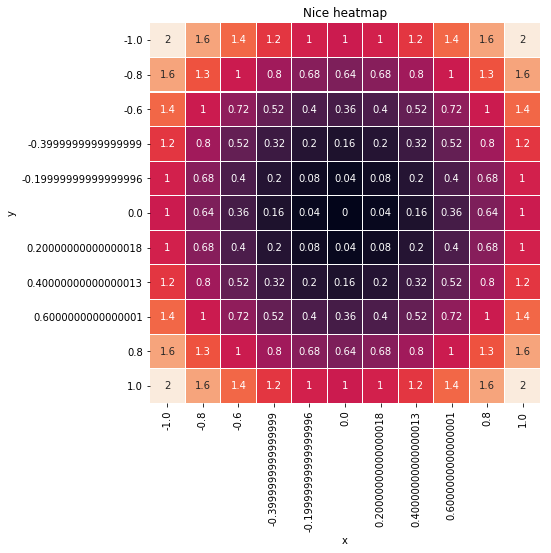

In [4]:
import seaborn as sns
x = np.linspace(-1,1,11)
y = np.linspace(-1,1,11)
X, Y = np.meshgrid(x, y)
z = X*X+Y*Y
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
sns.heatmap(z,ax=ax,linewidths=.1,annot=True,xticklabels=x,
            yticklabels=y,cbar=False)
ax.set(xlabel='x',ylabel='y',title='Nice heatmap')

# Data visualization - distributions

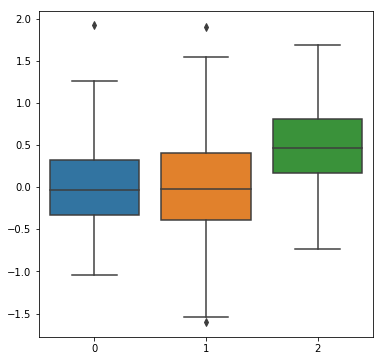

In [5]:
import seaborn as sns

sample1 = np.random.normal(0,0.5,250)
sample2 = np.random.normal(0,0.6,250)
sample3 = np.random.normal(0.5,0.5,250)

fig = plt.figure(figsize=(6,6))
ax = plt.gca()
sns.boxplot(data=[sample1,sample2,sample3],ax=ax);

Create better visualizations with `sns.boxplot`, `sns.stripplot`, `sns.violinplot`, and `sns.swarmplot`

# Pandas - Dataframes in Python

In [6]:
import pandas as pd
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [7]:
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Pandas - access data

In [8]:
print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [9]:
print(tips['day'])

0       Sun
1       Sun
2       Sun
       ... 
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]


In [10]:
print(tips['day'].unique())

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


In [11]:
display(tips[tips['day']=='Sat']) 

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Pandas - access data

* Find all unique group sizes
* Print the total bill and tip for groups of size 2

In [12]:
print(tips['size'].unique())

[2 3 4 1 6 5]


In [13]:
print(tips[tips['size']==2]['total_bill'])

0      16.99
3      23.68
6       8.77
       ...  
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 156, dtype: float64


In [14]:
print(tips[tips['size']==2]['tip'])

0      1.01
3      3.31
6      2.00
       ... 
241    2.00
242    1.75
243    3.00
Name: tip, Length: 156, dtype: float64


# Pandas - plotting with Seaborn

* Pandas had it's own plotting functions, but Seaborn's are much better

/home/mpalm/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mpalm/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


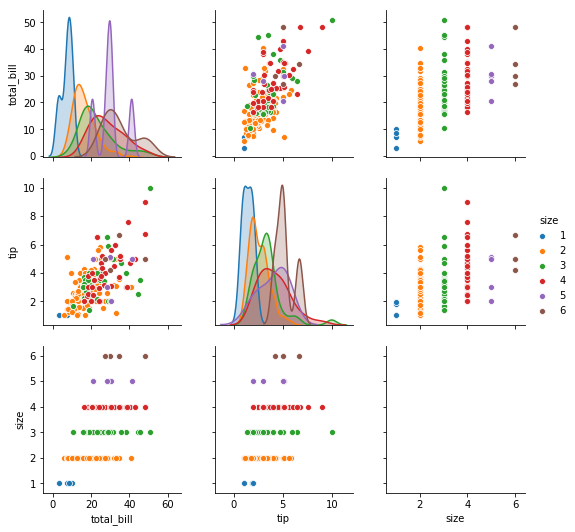

In [15]:
sns.pairplot(tips,hue='size')

# Pandas - plotting with Seaborn

Extend the `sns.pairplot(tips)` command so you can separate observations based on sex, group size, or day.

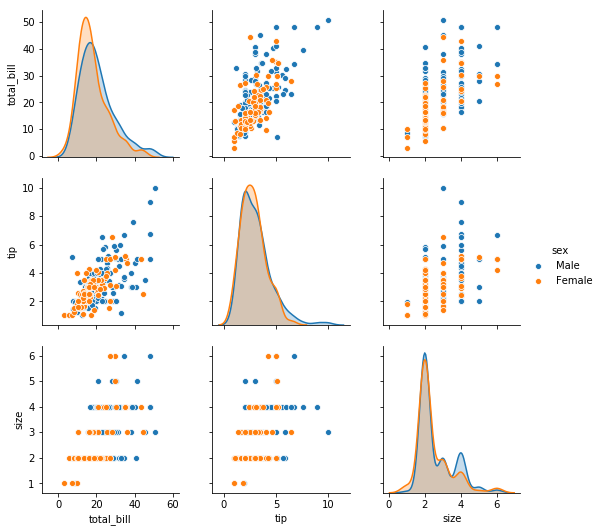

In [16]:
sns.pairplot(tips,hue='sex')

# Pandas - plotting with Seaborn

* The aforementioned plotting functions, `sns.boxplot`, `sns.stripplot`, `sns.violinplot`, and `sns.swarplot`, also work with this dataset.
* Create one such plot where you plot the tip size, for each sex and each day in one plot.

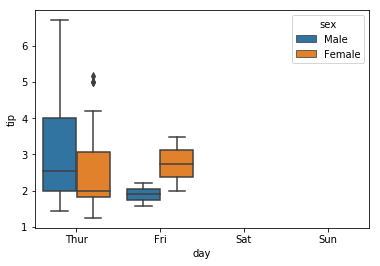

In [17]:
sns.boxplot(data=tips[tips['time']=='Lunch'],x='day',y='tip',hue='sex')
#sns.violinplot(data=tips,x='day',y='tip',hue='sex',split=True)